# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:>

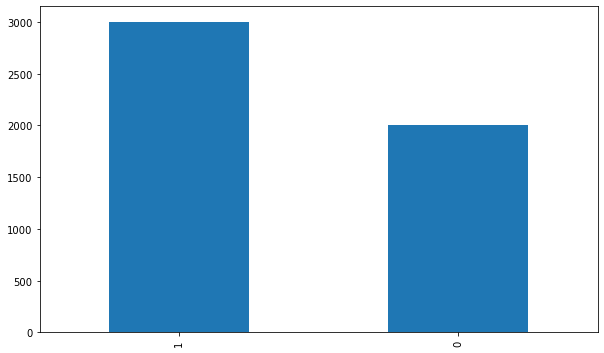

In [7]:
df['test_result'].value_counts().plot.bar()

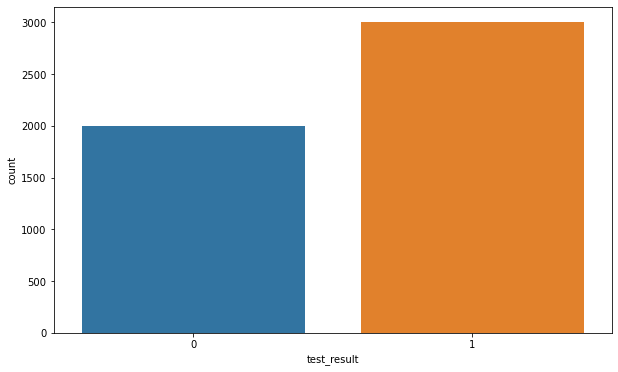

In [8]:
sns.countplot(df['test_result']);

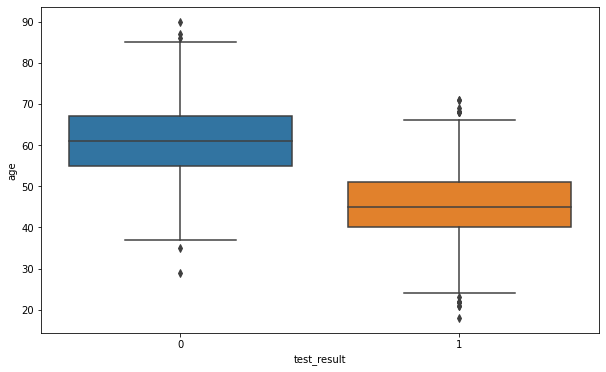

In [9]:
sns.boxplot(x='test_result',y='age',data=df);

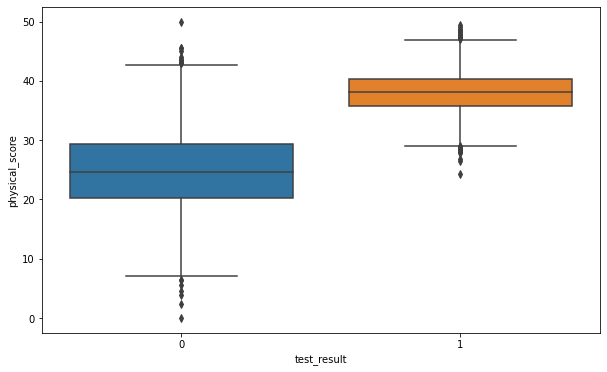

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df);

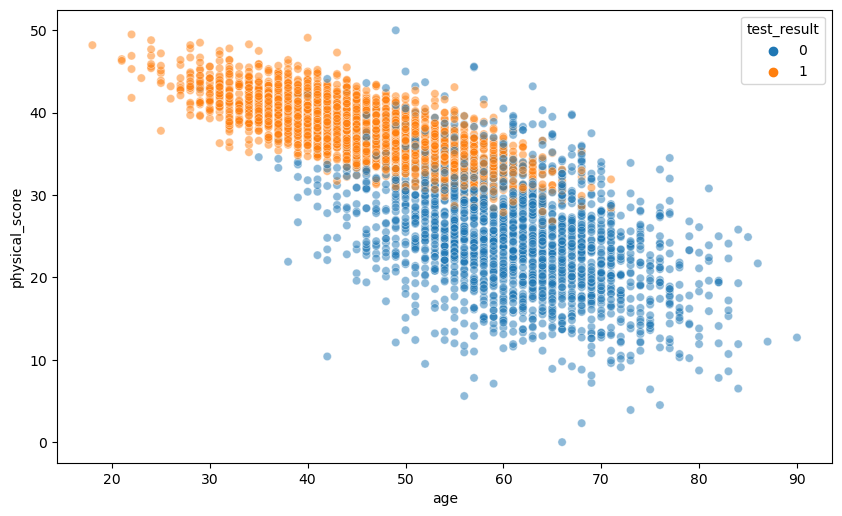

In [11]:
plt.figure(dpi=100)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

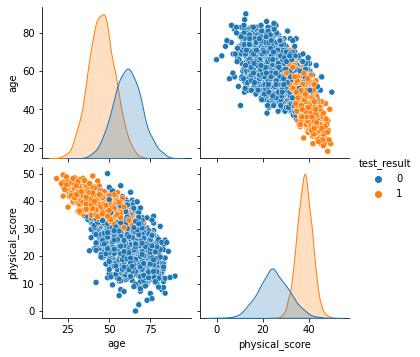

In [12]:
sns.pairplot(df,hue='test_result');

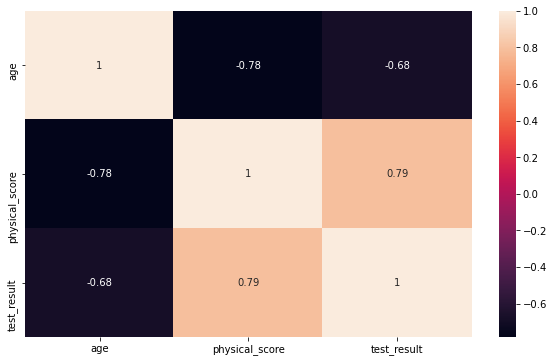

In [13]:
sns.heatmap(df.corr(), annot=True);

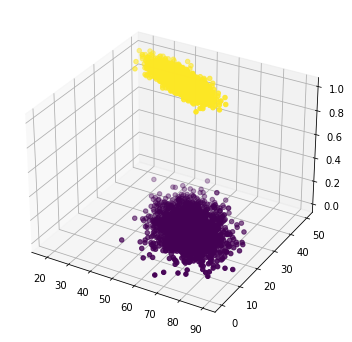

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

## Train | Test Split and Scaling

In [15]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [24]:
log_model.intercept_

array([0.48867341])

In [25]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [26]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [27]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [28]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred
1718,39.000,37.800,1,1
2511,45.000,38.700,1,1
345,56.000,21.800,0,0
2521,40.000,44.000,1,1
54,64.000,25.400,0,0
...,...,...,...,...
4770,46.000,37.700,1,1
188,59.000,36.500,1,1
3335,54.000,22.800,0,0
4583,58.000,20.500,0,0


In [29]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred,pred_proba
1718,39.000,37.800,1,1,0.976
2511,45.000,38.700,1,1,0.973
345,56.000,21.800,0,0,0.011
2521,40.000,44.000,1,1,0.998
54,64.000,25.400,0,0,0.025
...,...,...,...,...,...
4770,46.000,37.700,1,1,0.956
188,59.000,36.500,1,1,0.813
3335,54.000,22.800,0,0,0.019
4583,58.000,20.500,0,0,0.005


## Model Performance on Classification Tasks

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

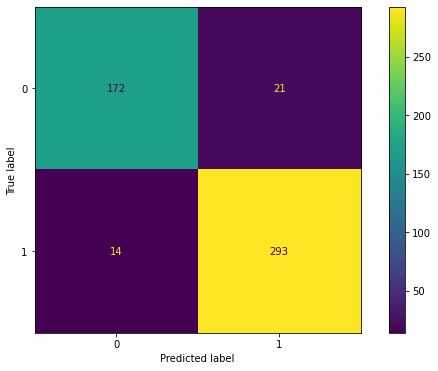

In [32]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

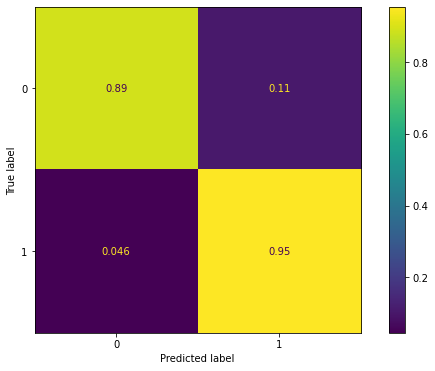

In [33]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

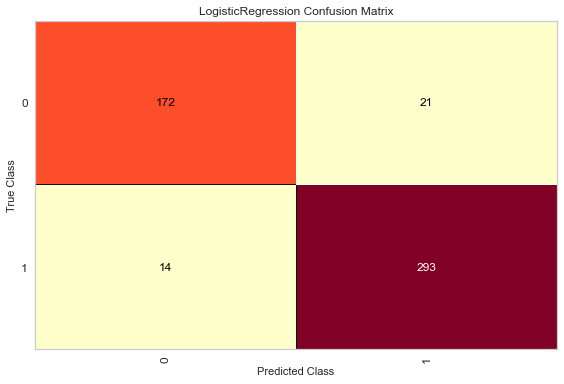

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show();

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [36]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,0.925,0.891,0.908,193.000
1,0.933,0.954,0.944,307.000
accuracy,0.930,0.930,0.930,0.930
macro avg,0.929,0.923,0.926,500.000
weighted avg,0.930,0.930,0.930,500.000


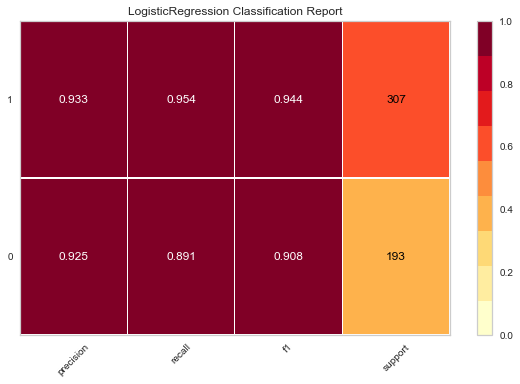

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [37]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()

In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [39]:
accuracy_score(y_test,y_pred)

0.93

In [40]:
log_model.score(X_test_scaled, y_test)

0.93

In [41]:
precision_score(y_test, y_pred)

0.9331210191082803

In [42]:
recall_score(y_test, y_pred)

0.9543973941368078

In [43]:
f1_score(y_test,y_pred, average = "weighted")

0.9297480869650194

## Cross Validate

In [44]:
from sklearn.model_selection import cross_val_score, cross_validate

In [45]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9146666666666666

[0.9        0.92444444 0.93555556 0.93111111 0.93777778 0.90222222
 0.89777778 0.91111111 0.89111111 0.91555556]


In [46]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="f1_weighted")
print('Cross-Validation Mean of f1_weighted Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of f1_weighted Scores 0.9142157347468058

[0.89891354 0.92405195 0.93485539 0.93101428 0.93765977 0.90261051
 0.89675804 0.91010501 0.89115971 0.91502915]


In [47]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [48]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.006,0.003,0.900,0.901,0.900,0.899
2,0.005,0.003,0.924,0.925,0.924,0.924
3,0.005,0.002,0.936,0.938,0.936,0.935
4,0.004,0.000,0.931,0.931,0.931,0.931
5,0.000,0.000,0.938,0.938,0.938,0.938
6,0.016,0.000,0.902,0.904,0.902,0.903
7,0.000,0.000,0.898,0.899,0.898,0.897
8,0.016,0.000,0.911,0.913,0.911,0.910
9,0.000,0.000,0.891,0.891,0.891,0.891
10,0.016,0.000,0.916,0.916,0.916,0.915


In [49]:
df_scores.mean()[2:]

test_accuracy             0.915
test_precision_weighted   0.916
test_recall_weighted      0.915
test_f1_weighted          0.914
dtype: float64